In [233]:
library(dplyr)
library(ggplot2)

df.hbw <- read.csv(paste("/Users/kevin/Desktop/",
                     "USP_587_data/HW2/household_hbw.csv", sep=""))
df.hia <- read.csv(paste("/Users/kevin/Desktop/",
                     "USP_587_data/HW2/2010_hia.csv", sep=""))

In [243]:
df.resveh <- df.hbw %>%
    select(resty, hhveh, htrips) %>%
    filter(resty <7 ) %>%
    mutate(hhveh = recode(hhveh, `0`=0, `1`=1, `2`=2, `3`=3, `4`=3, `5`=3, 
                          `6`=3, `7`=3, `8`=3)) %>%
    group_by(resty, hhveh) 
print(nrow(df.resveh))
df.resveh.sum <- summarize(df.resveh, count=n(), avg_trips = mean(htrips))
df.resveh.sum

[1] 6437


resty,hhveh,count,avg_trips
1,0,90,8.222222
1,1,1203,7.142145
1,2,2351,11.220757
1,3,1498,11.864486
2,0,26,10.576923
2,1,110,6.881818
2,2,39,11.153846
2,3,13,15.461538
3,0,219,7.716895
3,1,613,6.905383


In [235]:
ln.restyveh.sum <- lm(avg_trips ~ hhveh + resty, data=df.resveh.sum)
summary(ln.restyveh.sum)


Call:
lm(formula = avg_trips ~ hhveh + resty, data = df.resveh.sum)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0157 -0.8308 -0.4202  0.7225  4.0958 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  10.2598     1.3423   7.644 3.67e-06 ***
hhveh         1.3100     0.4299   3.047  0.00935 ** 
resty        -1.4120     0.4299  -3.285  0.00592 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.922 on 13 degrees of freedom
Multiple R-squared:  0.607,	Adjusted R-squared:  0.5465 
F-statistic: 10.04 on 2 and 13 DF,  p-value: 0.002311


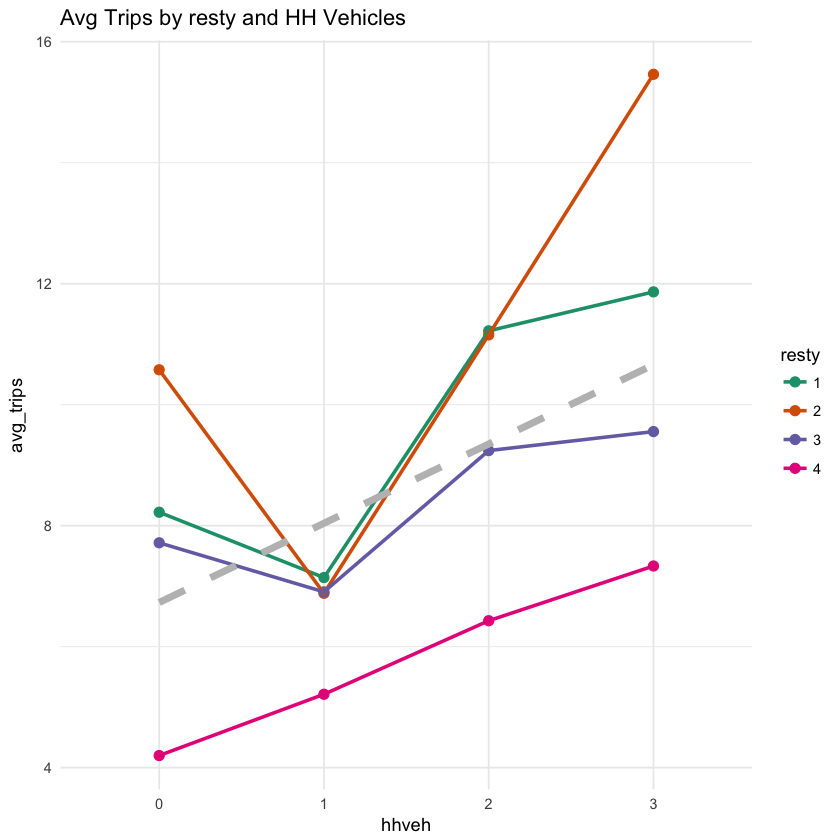

In [236]:
df.resveh.sum$ hhveh <- as.factor(df.resveh.sum$hhveh)
df.resveh.sum$ resty <- as.factor(df.resveh.sum$resty)

df.resveh.sum %>%
    ggplot(aes(x=hhveh, y=avg_trips, color=resty, group=resty)) + 
    theme_minimal() +
    geom_point(size=2.5) +
    geom_line(aes(x=hhveh, y=avg_trips, color=resty), size=1) +
    stat_smooth(method=lm, se=FALSE, linetype="dashed", aes(group=1), 
                size=2, color="gray") +
    labs(title= "Avg Trips by resty and HH Vehicles") +
    scale_color_brewer(palette="Dark2")

In [237]:
data <- data.frame(resty = 4, hhveh=2)
predict(ln.restyveh, data, interval="predict")

,fit,lwr,upr
1,8.550289,-6.35908,23.45966


In [248]:
# Manual Error calcs
df.resveh.fin <- merge(df.resveh, df.resveh.sum, by=c('resty', 'hhveh'))
df.resveh.fin$ResError <- (df.resveh.fin$htrips - 
                           df.resveh.fin$avg_trips)^2
df.resveh.fin$TotError <- (df.resveh.fin$htrips - 
                           mean(df.resveh.fin$htrips))^2
SSE <- sum(df.resveh.fin$ResError)
SST <- sum(df.resveh.fin$TotError)
R2 <- 1 - (SSE/SST)
print(R2)
k <- 9
n <- nrow(df.resveh.fin)
adj.R2 <- R2 - ((1 - R2)*(k - 1) / (n - k - 1))
print(adj.R2)

[1] 0.07454329
[1] 0.07339133


In [249]:
ln.restyveh.all <- lm(htrips ~ hhveh + resty, data=df.resveh)
summary(ln.restyveh.all)


Call:
lm(formula = htrips ~ hhveh + resty, data = df.resveh)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.250  -5.302  -1.527   3.611  68.750 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.2789     0.3588  20.288  < 2e-16 ***
hhveh         1.8612     0.1231  15.115  < 2e-16 ***
resty        -0.6128     0.1310  -4.677 2.97e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.597 on 6434 degrees of freedom
Multiple R-squared:  0.05688,	Adjusted R-squared:  0.05659 
F-statistic:   194 on 2 and 6434 DF,  p-value: < 2.2e-16


##  AVG TRIPS by HHSize

In [239]:
df.persveh <- df.hbw %>%
    select(hhsiz, hhveh, htrips) %>%
    mutate(hhsiz = recode(hhsiz, `1`=1, `2`=2, `3`=3, `4`=4, `5`=4, 
                          `6`=4, `7`=4, `8`=4)) %>%
    
    mutate(hhveh = recode(hhveh, `0`=0, `1`=1, `2`=2, `3`=3, `4`=3, `5`=3, 
                          `6`=3, `7`=3, `8`=3)) %>%
    group_by(hhsiz, hhveh) 

df.persveh.sum <- summarize(df.persveh, count=n(), 
                            avg_trips = mean(htrips))
df.persveh.sum

hhsiz,hhveh,count,avg_trips
1,0,259,6.467181
1,1,1177,4.361088
1,2,218,4.463303
1,3,70,4.642857
2,0,53,9.754717
2,1,517,8.305609
2,2,1263,7.828187
2,3,636,7.665094
3,0,23,14.000000
3,1,164,12.713415


In [240]:
fit <- lm(avg_trips ~ hhsiz + hhveh, data=df.persveh.sum)
print(fit)
summary(fit)
data <- data.frame(hhsiz=3, hhveh=2)
predict(fit, data, interval="predict")


Call:
lm(formula = avg_trips ~ hhsiz + hhveh, data = df.persveh.sum)

Coefficients:
(Intercept)        hhsiz        hhveh  
     0.5699       4.5876      -0.5729  




Call:
lm(formula = avg_trips ~ hhsiz + hhveh, data = df.persveh.sum)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5432 -0.7949 -0.2096  0.8374  1.8348 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.5699     0.7608   0.749   0.4672    
hhsiz         4.5876     0.2437  18.828 8.13e-11 ***
hhveh        -0.5729     0.2437  -2.351   0.0351 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.09 on 13 degrees of freedom
Multiple R-squared:  0.9651,	Adjusted R-squared:  0.9598 
F-statistic:   180 on 2 and 13 DF,  p-value: 3.345e-10


,fit,lwr,upr
1,13.18675,10.7318,15.6417


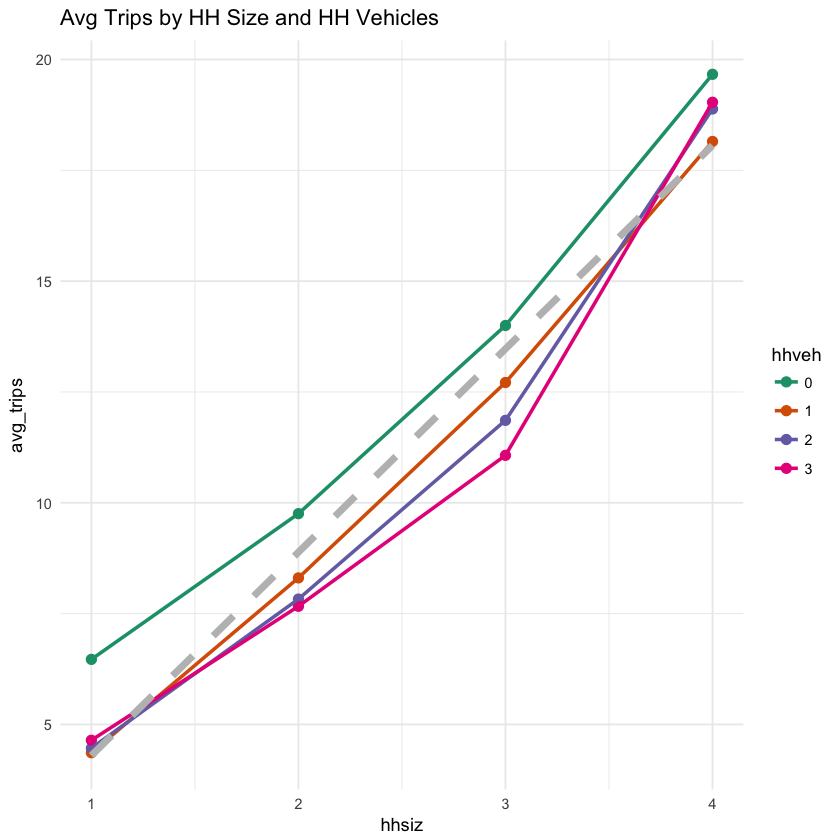

In [241]:
df.persveh.sum$ hhveh <- as.factor(df.persveh.sum$hhveh)

df.persveh.sum %>%
    ggplot(aes(x=hhsiz, y=avg_trips, color=hhveh, group=hhveh)) + 
    theme_minimal() +
    geom_point(size=2.5) +
    geom_line(aes(x=hhsiz, y=avg_trips, color=hhveh), size=1) +
    stat_smooth(method=lm, se=FALSE, linetype="dashed", aes(group=1), 
                size=2, color="gray") +
    labs(title= "Avg Trips by HH Size and HH Vehicles") +
    scale_color_brewer(palette="Dark2")